## descriptive data exploration
* study the trending of correlation

### feature ranking
* correlation btw each feature and unit price
* random forest ranking


In [1]:
%load_ext autoreload
# always reload modules marked with "%aimport"
%autoreload 1

import os,sys
import numpy as np
import pandas as pd

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), '../..', 'src')
sys.path.append(src_dir)

%aimport plot_utils
from plot_utils import *
%aimport preprocessing
from preprocessing import *
%aimport data_source
from data_source import *

In [2]:
ds = DataSource(host='localhost',port=5432, username='postgres', password='', database='sdra')
ds.show_views()
ds.update_views()

df_transaction = ds.get_view_df('property_address_transactions')
df_property = ds.get_view_df('property_addresses')
pp = Preprocess(df_transaction, df_property)

connect to database postgresql://postgres:@localhost:5432/sdra
['properties', 'property_features', 'transactions', 'property_addresses', 'property_address_transactions', 'property_estimate']
execute  c:\wenyan\dse_capstone\database\preprocess.sql


### retrieve the dataset

In [3]:
df_all_valid = pp.dataset(valid=True)
print('all dataset', df_all_valid.shape)
# last year transactions of valid properties
df_last_year_valid = pp.dataset(valid=True, date=('2016-10-01', '2017-10-01'))
print('last year', df_last_year_valid.shape)

transforming view
transforming pool
transforming impr_over_land
transforming date
transforming year_built
transforming sold_year
transforming sold_age
making sqft_zip_avg
making sqft_price_zip_avg
making sold_price_zip_avg
making sale_count_zip
making prop_count_zip
all dataset (1446992, 21)
transforming view
transforming pool
transforming impr_over_land
transforming date
transforming year_built
transforming sold_year
transforming sold_age
making sqft_zip_avg
making sqft_price_zip_avg
making sold_price_zip_avg
making sale_count_zip
making prop_count_zip
last year (37881, 21)


### correlation between features and target(sqft_price)
* with geography: street, zip, city
* with property characteristic: sqft, lot_size_sqft

In [26]:
df_all_valid[:3]

,sqft_zip_avg,sold_price,eval_imps,num_bed,impr_over_land,zip,street,sold_year,sold_price_zip_avg,sold_age,...,sqft,year_built,eval_land,prop_count_zip,sale_count_zip,view,sqft_price_zip_avg,num_bath,pool,sqft_price
0,1490.440277,447000,110954,3.0,0.833332,91911,HILLTOP,2017,213934.491731,62,...,1120,1955,133145,13639,25518,0,146.430716,1.0,0,399
1,1490.440277,330000,60000,3.0,0.222222,91911,JAMUL,2017,213934.491731,61,...,1050,1956,270000,13639,25518,1,146.430716,2.0,0,314
2,1490.440277,510000,344668,3.0,2.734137,91911,EMERSON,2017,213934.491731,58,...,1204,1959,126061,13639,25518,0,146.430716,2.0,0,423


In [27]:
features = set(pp.get_feature_list('all')) - set(['date', 'street', 'zip', 'sold_year', 'sqft_price']) # exclude features not suitable
features -= set(['year_built'])   # features under work

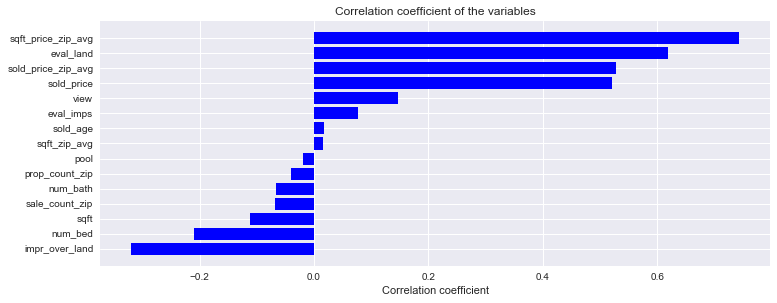

{'eval_imps': 0.077338197609331041,
 'eval_land': 0.61846442502312449,
 'impr_over_land': -0.32046510708445214,
 'num_bath': -0.065958691610244882,
 'num_bed': -0.20961935904804133,
 'pool': -0.019426027608156499,
 'prop_count_zip': -0.04032071787323286,
 'sale_count_zip': -0.06798179221133363,
 'sold_age': 0.018049030401652923,
 'sold_price': 0.5207020617735828,
 'sold_price_zip_avg': 0.52739438548844464,
 'sqft': -0.11262337737728986,
 'sqft_price_zip_avg': 0.74378014598476083,
 'sqft_zip_avg': 0.01523071986865601,
 'view': 0.14640347896467293}

In [28]:
plot_correlation(df_last_year_valid, 'sqft_price', features)

### correlation matrix of delivered features

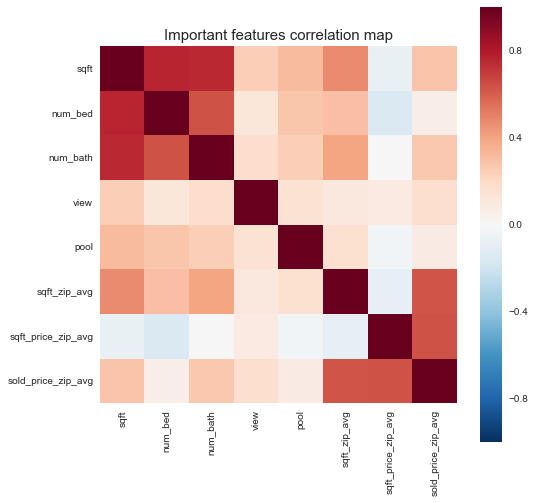

In [14]:
corr_features = list(features)
corr_features = pp.get_feature_list()
corrmat = df_last_year_valid[corr_features].corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Important features correlation map", fontsize=15)
plt.show()